Accuracy: 97.37%
Confusion Matrix:
[[70  1]
 [ 2 41]]
Precision: 97.62%
Recall: 95.35%
ROC-AUC: 1.00


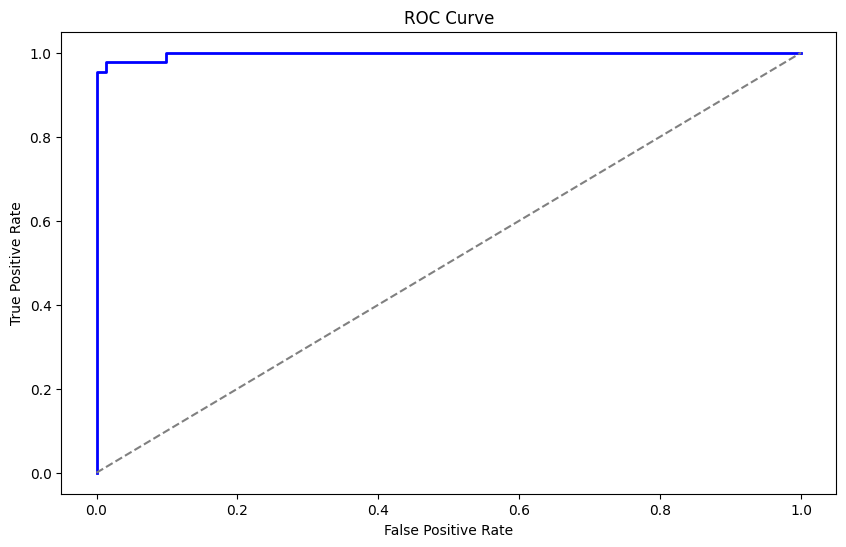

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


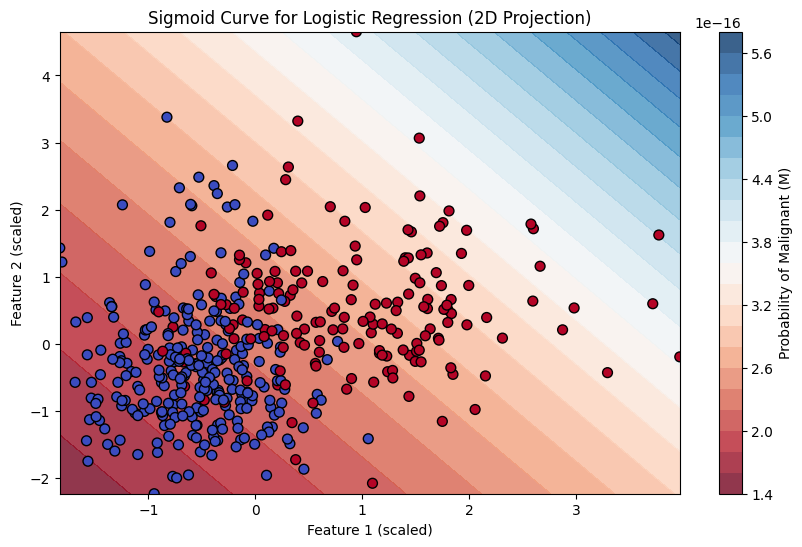


Evaluation with Threshold = 0.3:
Accuracy: 95.61%
Precision: 91.30%
Recall: 97.67%
ROC-AUC: 0.96

Evaluation with Threshold = 0.5:
Accuracy: 97.37%
Precision: 97.62%
Recall: 95.35%
ROC-AUC: 0.97

Evaluation with Threshold = 0.7:
Accuracy: 98.25%
Precision: 100.00%
Recall: 95.35%
ROC-AUC: 0.98


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

#  Load the dataset
url = "/content/data.csv"
data = pd.read_csv(url)


# Drop any irrelevant columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Replace non-numeric labels with numeric values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

#  Prepare features and labels
X = data_imputed.drop(['diagnosis'], axis=1)
y = data_imputed['diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)  # Set a higher max_iter if needed
model.fit(X_train, y_train)

#  Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (malignant)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#  Visualizing the Sigmoid Curve with only two features (same as before)
X_train_simple = X_train[:, :2]  # Taking just two features for easy visualization

# Create a meshgrid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_simple[:, 0].min(), X_train_simple[:, 0].max(), 100),
                     np.linspace(X_train_simple[:, 1].min(), X_train_simple[:, 1].max(), 100))

# Create a grid with only the first two features from the meshgrid
X_grid = np.c_[xx.ravel(), yy.ravel()]

# For the remaining 28 features, use the mean of the training data
X_mean = np.mean(X_train, axis=0)
X_grid_full = np.c_[X_grid, np.tile(X_mean[2:], (X_grid.shape[0], 1))]  # Append the mean values for the remaining features

# Standardize the grid features
X_grid_scaled = scaler.transform(X_grid_full)

# Predict the probability using the model for the meshgrid points
Z = model.predict_proba(X_grid_scaled)[:, 1]
Z = Z.reshape(xx.shape)

# Plotting the sigmoid curve
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, 25, cmap="RdBu", alpha=0.8)
plt.colorbar(label='Probability of Malignant (M)')

# Scatter plot for the training points
plt.scatter(X_train_simple[:, 0], X_train_simple[:, 1], c=y_train, s=50, edgecolor='k', cmap="coolwarm")
plt.title('Sigmoid Curve for Logistic Regression (2D Projection)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

#  Threshold tuning
# Experimenting with different thresholds (default threshold is 0.5)
thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    print(f"\nEvaluation with Threshold = {threshold}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_thresholded) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_pred_thresholded) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test, y_pred_thresholded) * 100:.2f}%")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_thresholded):.2f}")

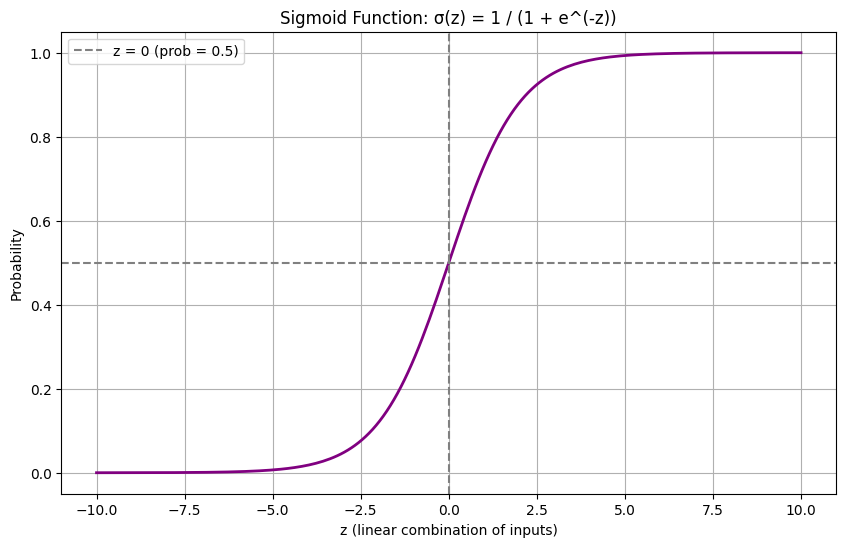

In [2]:
# Plotting the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)
sig = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sig, color='purple', lw=2)
plt.axvline(0, color='gray', linestyle='--', label='z = 0 (prob = 0.5)')
plt.axhline(0.5, color='gray', linestyle='--')
plt.title('Sigmoid Function: σ(z) = 1 / (1 + e^(-z))')
plt.xlabel('z (linear combination of inputs)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()
